# Data fetching and understand the train/val/test splits

In [1]:
import pandas as  pd
import h5py

C:\Users\Balajisri\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
f1 = h5py.File('SVHN_single_grey1.h5', 'r')
print(list(f1.keys()))

['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']


In [15]:
X_train = f1['X_train'][:]
print("X_train Shape -",X_train.shape)

y_train = f1['y_train'][:]
print("y_train Shape -", y_train.shape)

X_val = f1['X_val'][:]
print("X_val Shape -", X_val.shape)

y_val = f1['y_val'][:]
print("y_val Shape -", y_val.shape)

X_test = f1['X_test'][:]
print("X_test Shape -", X_test.shape)

y_test = f1['y_test'][:]
print("y_test Shape -", y_test.shape)

X_train Shape - (42000, 32, 32)
y_train Shape - (42000,)
X_val Shape - (60000, 32, 32)
y_val Shape - (60000,)
X_test Shape - (18000, 32, 32)
y_test Shape - (18000,)


We have totally 3 set of data like train, validate and test with 42000, 60000 and 18000 accordingly. dataset has the shape of 32x32

# Implement and apply an optimal k-Nearest Neighbor (kNN) classifier

Converting the image dataset in format which can used to KNN classifier

In [4]:
nsamples, nx, ny = X_train.shape
X_train_2d = X_train.reshape((nsamples,nx*ny))

nsamples, nx, ny = X_test.shape
X_test_2d = X_test.reshape((nsamples,nx*ny))

In [5]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=10)
neigh.fit(X_train_2d, y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=10, p=2,
           weights='uniform')

In [6]:
pred = neigh.predict(X_test_2d)

# Print the classification metric report

In [7]:

from sklearn.metrics import classification_report
import numpy as np
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.43      0.68      0.53      1814
           1       0.46      0.74      0.56      1828
           2       0.58      0.55      0.57      1803
           3       0.42      0.42      0.42      1719
           4       0.65      0.64      0.64      1812
           5       0.49      0.38      0.43      1768
           6       0.49      0.41      0.45      1832
           7       0.73      0.60      0.66      1808
           8       0.46      0.35      0.40      1812
           9       0.56      0.40      0.46      1804

   micro avg       0.52      0.52      0.52     18000
   macro avg       0.53      0.52      0.51     18000
weighted avg       0.53      0.52      0.51     18000



Seems like KNN model has accuracy around 50% with K = 10.

# Implement and apply a deep neural network classifier including

In [8]:
from keras.callbacks import EarlyStopping
import tensorflow as tf
from tensorflow.keras.layers import Reshape, BatchNormalization, Dense, Dropout
from tensorflow.keras.models import Sequential

Using TensorFlow backend.


In [9]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_val = tf.keras.utils.to_categorical(y_val, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

# Understand and be able to implement (vectorized) backpropagation 
# Implement batch normalization for training the neural network

In [10]:
mnist_model = Sequential()
mnist_model.add(Reshape((1024,),input_shape=(32,32,)))
mnist_model.add(BatchNormalization())
mnist_model.add(Dense(200, activation='relu'))
mnist_model.add(BatchNormalization())
mnist_model.add(Dense(100, activation='relu'))
mnist_model.add(BatchNormalization())
mnist_model.add(Dropout(0.25))
mnist_model.add(Dense(10, activation='softmax'))
mnist_model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
mnist_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 1024)              0         
_________________________________________________________________
batch_normalization (BatchNo (None, 1024)              4096      
_________________________________________________________________
dense (Dense)                (None, 200)               205000    
_________________________________________________________________
batch_normalization_1 (Batch (None, 200)               800       
_________________________________________________________________
dense_1 (Dense)              (None, 100)               20100     
_________________________________________________________________
batch_normalization_2 (Batch (None, 100)               400       
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
__________

In [11]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, mode='min')
mnist_model.fit(X_train,y_train,
          validation_data=(X_val, y_val),
          epochs=50,
          batch_size=32, callbacks=[early_stopping])

Train on 42000 samples, validate on 60000 samples
Epoch 1/50
42000/42000 [==============================] - 11s 272us/step - loss: 1.7948 - acc: 0.3968 - val_loss: 1.1362 - val_acc: 0.6545
Epoch 2/50
42000/42000 [==============================] - 7s 159us/step - loss: 1.2761 - acc: 0.5878 - val_loss: 0.9868 - val_acc: 0.7018
Epoch 3/50
42000/42000 [==============================] - 7s 158us/step - loss: 1.1233 - acc: 0.6380 - val_loss: 0.8276 - val_acc: 0.7518
Epoch 4/50
42000/42000 [==============================] - 7s 158us/step - loss: 1.0418 - acc: 0.6664 - val_loss: 0.7838 - val_acc: 0.7646
Epoch 5/50
42000/42000 [==============================] - 7s 158us/step - loss: 0.9801 - acc: 0.6879 - val_loss: 0.6937 - val_acc: 0.7953
Epoch 6/50
42000/42000 [==============================] - 7s 158us/step - loss: 0.9354 - acc: 0.7034 - val_loss: 0.6739 - val_acc: 0.8010
Epoch 7/50
42000/42000 [==============================] - 7s 158us/step - loss: 0.8974 - acc: 0.7141 - val_loss: 0.7082 -

In [12]:
pred = mnist_model.predict_classes(X_test)
pred

array([1, 7, 2, ..., 7, 9, 2], dtype=int64)

In [13]:
y_test.shape

(18000, 10)

In [16]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred)

array([[1635,   28,   11,    9,   16,   10,   18,   25,   20,   42],
       [  27, 1620,   17,   19,   44,   14,    7,   44,   20,   16],
       [  16,   28, 1581,   24,   23,   16,    4,   48,   17,   46],
       [  16,   56,   44, 1319,   19,  118,   19,   45,   51,   32],
       [  15,   48,   25,   21, 1602,   21,   20,   17,   13,   30],
       [  15,   18,    9,   68,   27, 1455,  100,   16,   39,   21],
       [  56,   22,    8,   21,   29,   94, 1497,   18,   66,   21],
       [  14,   59,   35,   22,   13,   17,    4, 1617,    9,   18],
       [  29,   43,   20,   31,   16,   53,   64,   14, 1449,   93],
       [  61,   39,   26,   22,   21,   38,   11,   19,   46, 1521]],
      dtype=int64)

In [17]:
names = np.unique(y_test)

In [18]:
from sklearn.metrics import classification_report
import numpy as np
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.87      0.90      0.88      1814
           1       0.83      0.89      0.86      1828
           2       0.89      0.88      0.88      1803
           3       0.85      0.77      0.81      1719
           4       0.89      0.88      0.88      1812
           5       0.79      0.82      0.81      1768
           6       0.86      0.82      0.84      1832
           7       0.87      0.89      0.88      1808
           8       0.84      0.80      0.82      1812
           9       0.83      0.84      0.83      1804

   micro avg       0.85      0.85      0.85     18000
   macro avg       0.85      0.85      0.85     18000
weighted avg       0.85      0.85      0.85     18000



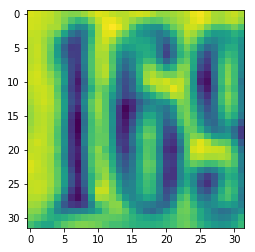

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(X_test[609])

In [20]:
mnist_model.predict_classes(np.reshape(X_test[609],(-1,32,32)))

array([6], dtype=int64)

# Conclusion

Neural Network performance well when compared with tradition machine learning model - KNN. 

Accuracy: 
 - KNN has the accuracy around 50%
 - Neural Network has the accuracy around 85%

Also KNN model is slow while predicting when compared but Neural network is fast and more accurate.